# Portfolio Part 4 - Analysis of Bike Rented Data of Seoul 

#### Xuan Nguyen Trinh - 48070769   

## I. Data Description & Analysis Task Introduction

**1. Data Description**

The data collected from [UC Irvine Data Library](), storing the bike renting data of Korea base on environmental and social factors. This dataset contains data on bike rentals in Korea, with 8760 entries accross 14 variables related to weather conditions, time, season, and operational status. Key column include the Rented Bike Count (the main variable of interest), and environmental factors such as Temperatur, Humidity, Wind Speed, visibility, Solar Radiation, Rainfall, and Snowfall. Additionally, it records how Season, Holiday status, and whether the bike system was functional on each day. 

**2. Analysis Goal** 
In this analysis, the main goal is to find the best features and machine learning methods that can be used to predict the volume of bike rental in Korea. By understanding these relationships, we hope to identify which features most significantly affects the daily rental, forming up the most effective and niche model to predict it.

The dataset includes the following columns:


| Column                    | Meaning                                                       |
|:--------------------------|:--------------------------------------------------------------|
| Rented Bike Count          | Total number of bikes rented per day                          |
| Hour                       | Time of day (in hours)                                        |
| Temperature (°C)           | Average temperature of the day                                |
| Humidity (%)               | Average humidity level                                        |
| Wind speed (m/s)           | Average wind speed                                            |
| Visibility (10m)           | Visibility in meters (multiplied by 10)                       |
| Dew point temperature (°C) | Dew point temperature of the day                              |
| Solar Radiation (MJ/m²)    | Solar radiation received during the day                       |
| Rainfall (mm)              | Total rainfall during the day                                 |
| Snowfall (cm)              | Total snowfall during the day                                 |
| Seasons                    | Season during the record (e.g., Winter, Spring)               |
| Holiday                    | Whether the day was a holiday (Yes/No)                        |
| Functioning Day            | Whether it was a functioning workday (Yes/No)                 |

## II. Coding Execution

### 1. Data Import

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt


1. Encode the variable 
2. Logistic Regression 
3. RFE to rank the features 

In [2]:
data = pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### 2. Data Cleaning and Transformation

**a. Filter the data so that we have daily record of bike rent**

The initial dataset shows the records of bike renting by hours of a day, which might be too detailed and complicated for analysis. Hence, it's reasonable to group up the data so that we have the daily data of bike renting. For features, we will select the most suitable group methods (sum or average) to get the daily records; for categorical data like *'Seasons'*, *'Holiday'*, and *'Functioning Day'*, we will set it as constant for the whole day.

In [3]:
# Sample data: Assuming 'data' is your DataFrame

# Define aggregation functions for numerical and categorical columns
agg_funcs = {
    'Rented Bike Count': 'sum',  # Total rentals per day
    'Temperature(°C)': 'mean',   # Average daily temperature
    'Humidity(%)': 'mean',       # Average daily humidity
    'Wind speed (m/s)': 'mean',  # Average daily wind speed
    'Visibility (10m)': 'mean',  # Average daily visibility
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'sum',       # Total rainfall per day
    'Snowfall (cm)': 'sum',      # Total snowfall per day
    'Seasons': 'first',          # Categorical, keep first value (assumed same per day)
    'Holiday': 'first',
    'Functioning Day': 'first'
}

# Group by 'Date' and aggregate
daily_data = data.groupby('Date').agg(agg_funcs).reset_index()


**b. Drop categorical columns that have all-unique value**

It is crucial to remove the categorical data with all-unique value as those data does not provides any meaningful statisticall influences. In this case, we will remove the record of date from our data frame since the date represents each days of a year.

In [4]:
# Step 1: Identify columns with unique values in each row (same length as data)
categorical_columns = daily_data.select_dtypes(include=['object']).columns 
unique_column = []  # List to store columns with all unique values
for col in categorical_columns:  # Loop through each categorical column
    if len(pd.unique(daily_data[col])) == len(daily_data): 
        unique_column.append(col)

# Step 2: Drop columns with all unique values
daily_data.drop(unique_column, axis=1, inplace=True) 

# Step 3: Update the list of categorical columns
categorical_columns = daily_data.select_dtypes(include=['object']).columns

**c. Transform categorical data**

In order to fit the data into models, it is crucial to encode the Categorical (or Object) data columns. In this case, we will use the ordinal encoder to  transform the categorical data. 

In [5]:
# Date Encoding

from sklearn.preprocessing import OrdinalEncoder 

ordinalencoder = OrdinalEncoder() #Use Ordinal encoder 

daily_data[categorical_columns] = ordinalencoder.fit_transform(daily_data[categorical_columns])

### 3. Correlation Analysis



**1. Determine correlation**

With Rented Bike Count as our target variable, analyzing the correlation of each feature with the target can provide valuable insights into factors influencing model performance. Utilizing seaborn, we generate a heatmap to visualize these correlation indices, highlighting the strength and direction of each feature’s relationship with the target.

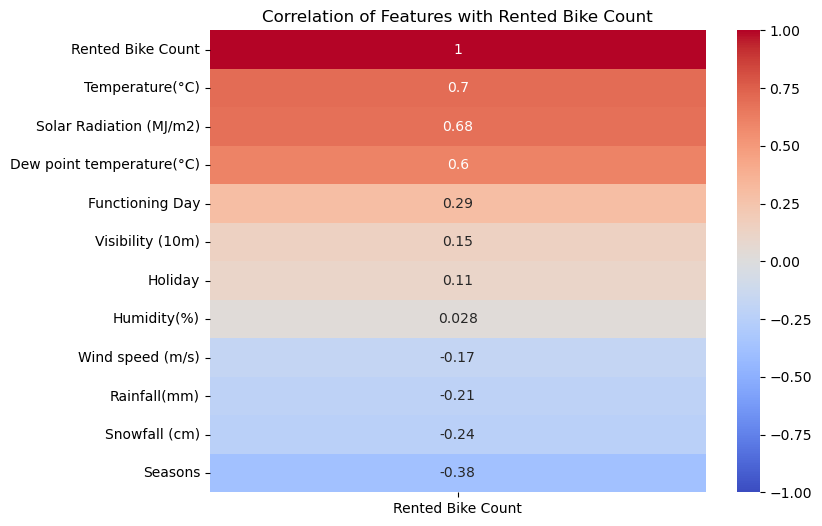

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = daily_data.corr()

# Plot heatmap focusing on 'Rented Bike Count' corretions
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Features with Rented Bike Count")
plt.show()

**Comment on the correlation**

As showed above, it's clear that Temperature, Solar Radiation, and dew point temperature has the highest impact on the bike renting, with the correlation of 0.7, 0.68, and 0.6 respectively. At the same time, factors like Visibility, Holiday, and Humidity does not have strong impact on the target, especially Humidity with a rate of approximately 0. However, it's worth noting that these factors affect each other when it comes to the whole model; thus, a more comprehensive feature selection should be put into place to get the best result

**2. Examine most correlated feature**

As calculated, **Temperature** appears to have the strongest and outstanding influence to Bike Renting Count; herefore, it would be beneficial to develop a model that specifically examines its impact.


**a. Firstly, we plot the temperature data on a scatter plot**

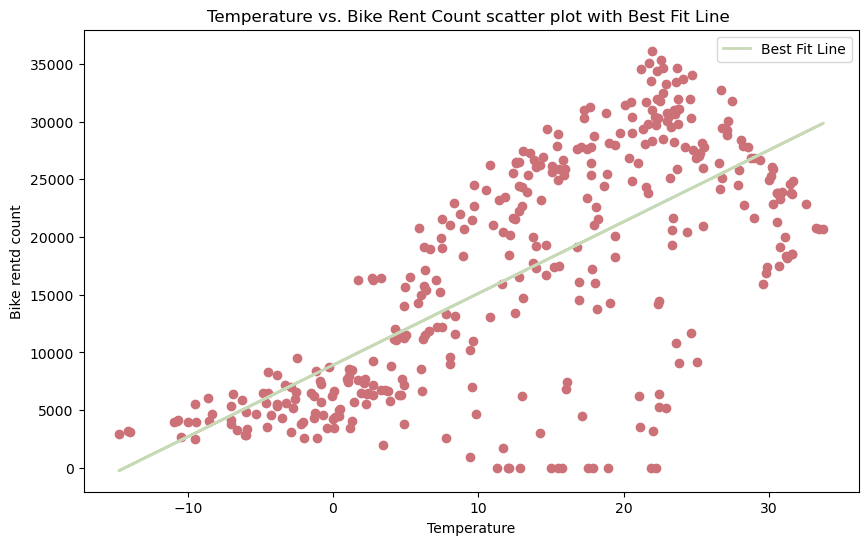

In [20]:
#Extract Temperature from the initial Dataframe
temp_only = daily_data['Temperature(°C)'].values.reshape(-1,1)

#Extract Bike Rented Count 
target_temp = daily_data['Rented Bike Count']

#Create the scatter plot presenting data points alligning with Temperature and Bike rented count
plt.figure(figsize = (10,6))
plt.scatter(temp_only, target_temp,color = '#CC7178', marker = 'o')
plt.title("Temperature vs. Bike Rent Count scatter plot with Best Fit Line ")
plt.xlabel('Temperature')
plt.ylabel('Bike rentd count')

# Calculate line of best fit
slope, intercept = np.polyfit(daily_data['Temperature(°C)'], target_temp, 1)
best_fit_line = slope * daily_data['Temperature(°C)'] + intercept

# Plot the line of best fit
plt.plot(daily_data['Temperature(°C)'], best_fit_line, color='#C7D9B7', linewidth=2, label='Best Fit Line')
plt.legend()
plt.show()


**Comment on the plot:**

The data points shows a slight positive trend, representing the positive result of the correlation calculated early on(0.7). From this plot, we can claim that the hotter the weather is, the more bike are being rented. 

**b. Secondly, we proceeded to fit a model to quantify the relationship between Temperature and the Rented Bike Count.**


In [8]:
#Import LinearRegression, and two performance measurement of MSE and R-squared
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [9]:
#Fit the model using the predictor of Temperature, and the Outcome of Bike Rented Count
linear_mod = LinearRegression()
linear_mod.fit(temp_only, target_temp)

#Use the fitted function to re-predict the target
y_pred_temp = linear_mod.predict(temp_only)

#get the test score
mse_temp = mean_squared_error(y_pred_temp, target_temp)
r2_temp = r2_score(y_pred_temp, target_temp)

print("MSE:", mse_temp )
print("R^2:", r2_temp)

MSE: 53551012.211192176
R^2: -0.04184163206706759


**Comment on Test Score**

The Mean Square Error and R-squared indicate this model is relatively ill-performed. The MSE turns out to be extremely high; meanwhile, R-squared score is negative, meaning the current linear regression model is worse than a simple horizontal line at the mean of the target values. Hence, it is reasonable to claim that the linear regression does not effectively explain this relationship. This result is expected as we can observed a curvalture trend on the scatter plot generated above rather than a linear pattern, indicating that a more complex model might be needed to better represent this relationship.

As a result, we must procede to test the Polynomial Model on the data, which is more capable of captureing the culvature trend 

**c. Fit the Polynomial Model and generate the prediction line**

Degree 2 -polynomial MSE: 52330242.3340007
Degree 2 - Polynomial R^2: 0.5013857168838255
Degree 3 -polynomial MSE: 48468490.12473582
Degree 3 - Polynomial R^2: 0.5381813578652899


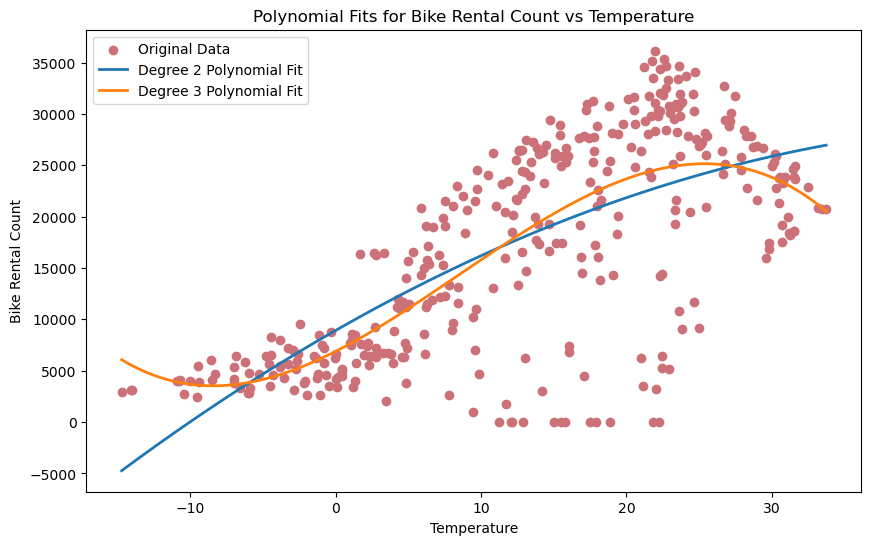

In [10]:
#Import the function
from sklearn.preprocessing import PolynomialFeatures

# Scatter plot for the original data
plt.figure(figsize=(10, 6))
plt.scatter(temp_only, target_temp, color='#CC7178', marker='o', label="Original Data")
plt.xlabel("Temperature")
plt.ylabel("Bike Rental Count")

#Test with the degree of 2 and 3 
degrees =[2,3]

temp_range = np.linspace(temp_only.min(), temp_only.max(), 100).reshape(-1, 1)

#Loop through each degree to get the test result
for deg in degrees:
    poly = PolynomialFeatures(degree = deg) 

    #Step 1: Fit the transform accordingly
    temp_poly = poly.fit_transform(temp_only)

    # Step 2: Fit the linear regression model on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(temp_poly, target_temp)

    # Step 3: Make predictions using the polynomial model
    y_pred_poly = poly_model.predict(temp_poly)

    # Step 4: Calculate MSE and R^2 for the polynomial model
    mse_poly = mean_squared_error(target_temp, y_pred_poly)
    r2_poly = r2_score(target_temp, y_pred_poly)

    #Step 5: Print out test result
    print(f"Degree {deg} -polynomial MSE:", mse_poly)
    print(f"Degree {deg} - Polynomial R^2:", r2_poly)

    #GRAPHING
    # Predict over the temperature range for smooth line plotting
    temp_range_poly = poly.transform(temp_range)
    bike_rentals_pred = poly_model.predict(temp_range_poly)
    
    # Plot the polynomial line
    plt.plot(temp_range, bike_rentals_pred, label=f"Degree {deg} Polynomial Fit", linewidth=2)

# Add legend and display the plot
plt.legend()
plt.title("Polynomial Fits for Bike Rental Count vs Temperature")
plt.show()


**Comment on Polynomial result** 

From both the MSE, R-squared scores and the Graph, we can see a visible improvement in the model's performance, as the MSE of both 2-degree and 3-degree model shrink, and the R-squared increase to approximately 0.6. Additionally, it's worth noting that the scores might improve further if we rule out the out-liers. 

Nevertheless, 3-degree polynomial model still perform better than 2-degree since it has a lower MSE score, and appears to be visually fitter with the data-point distribution. 

Here's the final Polynomial model that is best predicting the Bike Rental Count using Temperature

In [11]:
# Get the coefficients from the polynomial model for the 3rd degree
coeffs = poly_model.coef_
intercept = poly_model.intercept_

# Since we're using a 3rd-degree polynomial, assign each term
a = intercept
b, c, d = coeffs[1], coeffs[2], coeffs[3]

# Print the function in the form of y = a + bx + cx^2 + dx^3
print(f"y = {a:.4f} + ({b:.4f})*x + ({c:.4f})*x^2 + ({d:.4f})*x^3")

y = 6889.4126 + (718.0948)*x + (28.4507)*x^2 + (-1.1189)*x^3


Where **'y'** is the Target variable of Bike Rented Count, and **'x'** represent temperature

### 4. Model Analysis

Next up, we will train and test the model to see how well all the features are in predicting the count of bike rented


**a. Train and Test data using Linear Regression** 

Firstly, split the data into the training set and testing set, having the testing set to be 30% of the data. 

In [12]:
#Split training and testing data
from sklearn.model_selection import train_test_split

#Select Determinant features and Target feature
x = daily_data.drop(['Rented Bike Count'], axis = 1)
y = daily_data['Rented Bike Count']

#List of R-squared result from differnt model
r2_list = []


#Split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 48070769)

Secondly, Fit the model using LinearRegression on the training set, then predict the bike rented using the testing determinants.  

In [13]:
#Fit the training data with linear regression model
linear_mod = LinearRegression()
linear_mod.fit(x_train, y_train)



#Predict the target using testing determinants
y_pred_linear = linear_mod.predict(x_test)


#Get performance score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

#Add the score to the score list
r2_list.append(r2_linear)

print("MSE:", mse_linear )
print("R^2:", r2_linear)

MSE: 17938831.708576187
R^2: 0.8285435527089683


**Comment on result:** 

The MSE and R-squared scores reveal a notable improvement in the model’s performance, with a substantial reduction in the MSE and an R-squared value that indicates a good fit at approximately 0.83. This suggests that the model is now capturing a significant portion of the variance in bike rental counts based on temperature. These results imply that the chosen predictors are indeed influential for bike rentals, though further tuning or additional variables might yield even more refined predictions.

**b. Testing Polynomial Model** 

Next up, we will try Polynomial Model in the attempt to improve the current model. 

In [14]:
from sklearn.model_selection import cross_val_score

# Initialize variables to store the best degree and corresponding R² score
best_degree = None
best_cv_r2 = -float('inf')  # Start with a very low R² value
degrees = [1, 2]  # You can expand this range if needed

# Loop through each degree to test polynomial features
for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x)

    # Initialize the linear regression model
    model = LinearRegression()

    # Perform cross-validation and calculate the average R² score
    cv_r2 = cross_val_score(model, X_poly, y, cv=5, scoring='r2').mean()
    cv_mse = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()

    r2_list.append(cv_r2)

    print(f"Degree {degree} - CV R² Score: {cv_r2}")
    print(f"Degree {degree} - CV MSE Score: {cv_mse}")


    # Update best degree if this degree has a higher R² score
    if cv_r2 > best_cv_r2:
        best_cv_r2 = cv_r2
        best_cv_mse = cv_mse
        best_degree = degree

print(f"\nBest Degree: {best_degree} with Cross-Validation R² Score: {best_cv_r2}")

Degree 1 - CV R² Score: 0.8037903603989669
Degree 1 - CV MSE Score: 20702461.285035558
Degree 2 - CV R² Score: -4.514650678094707
Degree 2 - CV MSE Score: 545139487.252702

Best Degree: 1 with Cross-Validation R² Score: 0.8037903603989669


**Comment on Polynomial Model Result** 

The cross-validation scores indicate that the model performs best with a polynomial degree of 1, achieving an R² score of approximately 0.80. As the polynomial degree increases to 2, the model’s performance significantly deteriorates, with both the R² and MSE scores indicating poor fit. This suggests that a linear relationship (degree 1) is more appropriate for this dataset, while higher polynomial degrees overfit or do not capture the data’s trend effectively, leading to extreme error values. Consequently, a linear approach remains optimal for this analysis.

**c. Using Neural Network** 

Neural networks, particularly with multiple layers, can capture non-linear relationships more effectively. This model type can help improve performance by leveraging complex patterns in the data that simpler models may overlook, especially when there is potential for interactions between variables. Thus, employing a neural network offers an opportunity to improve prediction accuracy for the bike rental counts based on various features.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Standardize the features for better neural network performance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the neural network model having 3 hidden layers, having 64, 32, and 16 objects respectively
mlp = MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=10000, random_state=48070769)

# Train the model
mlp.fit(x_train, y_train)

# Predict on the test set
y_pred = mlp.predict(x_test)

# Evaluate the model
r2_neural = r2_score(y_test, y_pred)

r2_list.append(r2_neural)
print(f"MLP Neural Network R² Score: {r2_neural:.4f}")

MLP Neural Network R² Score: 0.8776


**Comment on neural network result**

The result obtained is impressively high, with a R-squared score of 0.87, indicating that the model is very efficient in predicting the bike rented count. This result shows a clear improvement compared to the linear regression methods as neural network captures the hidden non-linear relationships between variables. 

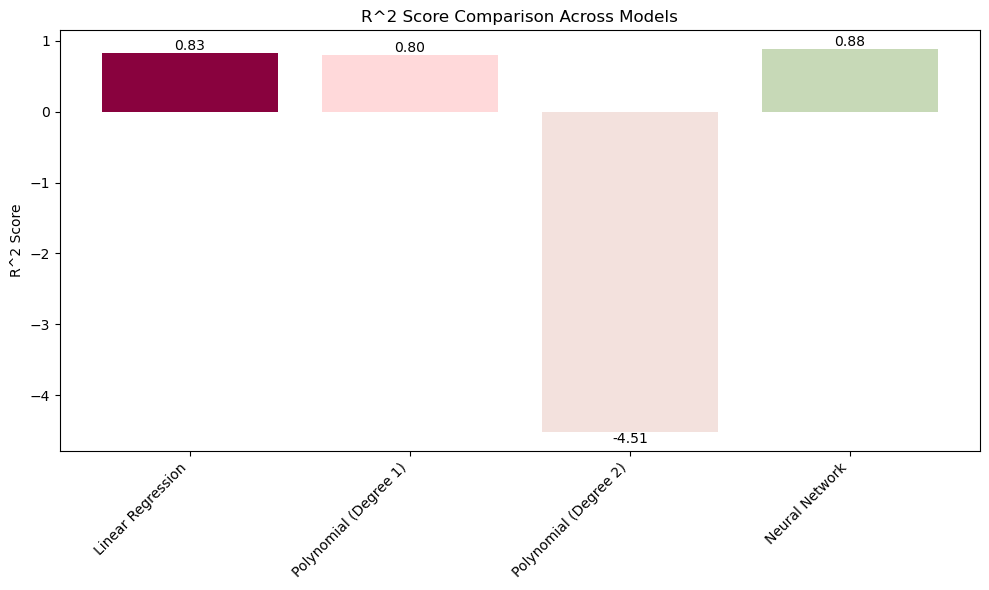

In [16]:
import matplotlib.pyplot as plt

# Test results for R^2 scores
models = ["Linear Regression", "Polynomial (Degree 1)", "Polynomial (Degree 2)", "Neural Network"]
colors = ['#89023E', '#FFD9DA', '#F3E1DD', '#C7D9B7']

# Create bar plot for R^2 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_list, color=colors)

# Add data labels
for bar, score in zip(bars, r2_list):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}',
             ha='center', va='bottom' if score >= 0 else 'top', fontsize=10, color='black')

plt.title("R^2 Score Comparison Across Models")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Comment on the bar plot**

In conclusion, Neural Network appears to have the highest R-squared scores, claiming itself to be the most precise model to predict the bike rented count base on all the determinant features

### 5. Classification

To gain deeper insights into our dataset, we can divide it into clusters that exhibit similar behavior. For this dataset, our goal is to categorize daily bike rental counts into three predefined labels: “Low Demand,” “Average Demand,” and “High Demand.”

Since we have specified the number of groups to be three, the KMeans clustering algorithm is an ideal choice for this classification.

In [17]:
from sklearn.cluster import KMeans
import pandas as pd

# Standardize the features for fair clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Step 2: Apply K-Means Clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
daily_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Calculate the Mean Rented Bike Count for Each Cluster
cluster_means = daily_data.groupby('Cluster')['Rented Bike Count'].mean()
print("Mean Rented Bike Count per Cluster:")
print(cluster_means)

# Optional: Visualize the distribution of clusters
cluster_sizes = daily_data['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)


Mean Rented Bike Count per Cluster:
Cluster
0    12868.865169
1     6121.000000
2    23595.287958
Name: Rented Bike Count, dtype: float64

Cluster Sizes:
Cluster
2    191
0     89
1     85
Name: count, dtype: int64


**Comment on Classification Result**

The Kmean methods have successfully devide the dataset into three clusters, having the average Rented Bike Count of approximately 12868, 6121, and 23595 respectively. This result perfectly alligns with our aim of categorizing the dataset into three levels of demand as the gap between the mean of each clusters is significant.

In [18]:
#Update our dataframe with the new column indiciating the valuation of level of demand of each record
cluster_mapping = {
    1: "Low Demand",
    0: "Average Demand",
    2: "High Demand"
}


#Add new column into the data frame 
daily_data['Demand_Level'] = daily_data['Cluster'].map(cluster_mapping)
daily_data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Cluster,Demand_Level
0,4290,-1.283333,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.0,0.0,3.0,0.0,1.0,1,Low Demand
1,5377,-3.866667,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.0,21.7,3.0,1.0,1.0,1,Low Demand
2,5132,0.450000,64.208333,3.554167,1084.000000,-6.387500,0.747500,2.5,0.0,1.0,0.0,1.0,1,Low Demand
3,17388,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.0,0.0,1.0,1.0,1.0,0,Average Demand
4,26820,20.341667,72.791667,1.437500,456.458333,15.120833,0.517500,0.0,0.0,1.0,0.0,1.0,0,Average Demand


**Visualize the cluster**

As the figure below shows, when we color-coded the data points as demand_level, the result shows relatively sync behavior as the clusters. This might be the indicator for the correctness of our cluster, showing the reliability of the result.

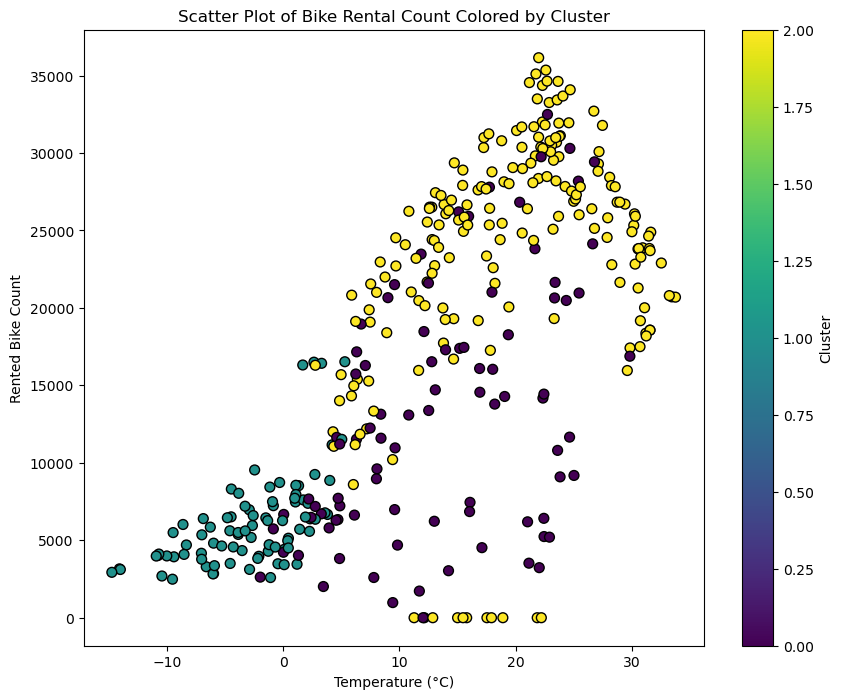

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(daily_data['Temperature(°C)'], daily_data['Rented Bike Count'], c=daily_data['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.title("Scatter Plot of Bike Rental Count Colored by Cluster")
plt.colorbar(label="Cluster")
plt.show()

## III. Conclusion 



**I. Correlation** 

*Temperature* appears to be the strongest correlated feature to the target along with *Solar Radiation* and *Dew Point Temperature*. Such insights imply that bike rental services could benefit from strategies aligned with weather forecasts, such as preparing additional resources during warmer days, potentially boosting customer satisfaction and operational efficiency.

Furthermore, it has been proven that the 3-degree Polynomial Model is best to fit the data distribution taking *Temperature* as the determinant. 


**II. Model Selection**

While Linear Regression provided a reasonable fit to the data, the Neural Network model proved more effective, as evidenced by higher R-squared scores. The Neural Network’s ability to capture complex patterns makes it a better choice for predicting bike rental demand. On the other hand, Polynomial Regression with degrees higher than 1 led to poor performance, indicating that overly complex polynomial terms may not be suitable for this dataset. These results suggest that simpler, linear approaches may not always suffice, while excessive complexity can hinder prediction accuracy. Future analyses could explore other machine learning models like decision trees or support vector machines for further improvement.

**III. Data Classification** 

It is appropriate to divide the dataset into three clusters representing “Low Demand,” “Average Demand,” and “High Demand” for bike rentals. By categorizing demand levels, we can identify specific periods of high and low rental activity, enabling targeted promotions or resource allocation during peak times. For instance, during “High Demand” periods, the company could implement dynamic pricing or special offers to maximize revenue, while “Low Demand” periods could be targeted with discounts to encourage ridership.
